In [1]:
import pandas as pd

In [2]:
df=pd.read_csv(r"F:\Data science\Guvi\Customer Conversion Prediction - Customer Conversion Prediction.csv")
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no


In [4]:
ccp=df.copy()
ccp

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no


In [5]:
ccp.describe()

,age,day,dur,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


In [8]:
ccp.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [9]:
ccp.isnull().values.any()

False

In [20]:
# dropping the column 'call_type' , because call type is not mandatory for the insurance subscription

ccp=ccp.drop(['call_type'],axis=1)

In [13]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn import tree
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.tree import DecisionTreeClassifier

In [15]:
import category_encoders as ce

In [31]:
from sklearn.preprocessing import LabelEncoder

In [22]:
# Splitting the feature and target variable

X = ccp.drop(['y'],axis=1)
Y = ccp['y']

In [24]:
# Splitting training and test data

x_train , x_test , y_train , y_test = train_test_split(X,Y,train_size=0.75,test_size=0.25,random_state=35)

In [25]:
x_train.head()

,age,job,marital,education_qual,day,mon,dur,num_calls,prev_outcome
24121,28,management,single,tertiary,4,nov,15,1,unknown
12992,28,blue-collar,married,secondary,7,jul,327,2,unknown
44346,34,admin.,married,tertiary,30,jul,292,1,success
19059,43,management,single,tertiary,5,aug,155,1,unknown
37911,37,services,single,secondary,14,may,553,2,unknown


In [26]:
x_test.head()

,age,job,marital,education_qual,day,mon,dur,num_calls,prev_outcome
43897,31,management,single,tertiary,9,jun,163,2,success
5188,47,services,married,unknown,21,may,154,5,unknown
24888,49,management,married,tertiary,18,nov,132,3,unknown
13782,33,blue-collar,married,secondary,10,jul,489,1,unknown
34158,31,technician,single,tertiary,30,apr,266,1,unknown


In [33]:
# By using LabelEncoding changing the categorical values to numerical values
le=LabelEncoder()
Y_train=le.fit_transform(y_train)
Y_test= le.fit_transform(y_test)

In [27]:
# Encoding the categorical values to numerical value 

encoder = ce.OrdinalEncoder(cols=x_train.columns)

X_train = encoder.fit_transform(x_train)
X_test = encoder.transform(x_test)

In [29]:
X_train.head()

,age,job,marital,education_qual,day,mon,dur,num_calls,prev_outcome
24121,1,1,1,1,1,1,1,1,1
12992,1,2,2,2,2,2,2,2,1
44346,2,3,2,1,3,2,3,1,2
19059,3,1,1,1,4,3,4,1,1
37911,4,4,1,2,5,4,5,2,1


In [30]:
X_test.head()

,age,job,marital,education_qual,day,mon,dur,num_calls,prev_outcome
43897,6,1,1,1,28,5,728.0,2.0,2
5188,24,4,2,4,23,4,300.0,3.0,1
24888,20,1,2,1,7,1,121.0,4.0,1
13782,17,2,2,2,19,2,722.0,1.0,1
34158,6,5,1,1,3,8,29.0,1.0,1


In [35]:
dt_gini = DecisionTreeClassifier(criterion='gini',max_depth=3 , random_state=41) 

dt_gini.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=3, random_state=41)

In [36]:
y_pred = dt_gini.predict(X_test)

In [37]:
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))

Model accuracy score with criterion gini index: 0.8850


In [38]:
y_pred_train_gini = dt_gini.predict(X_train)

y_pred_train_gini

array([0, 0, 0, ..., 0, 0, 0])

In [39]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(Y_train, y_pred_train_gini)))

Training-set accuracy score: 0.8845


In [40]:
print('Training set score: {:.4f}'.format(dt_gini.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(dt_gini.score(X_test, Y_test)))

Training set score: 0.8845
Test set score: 0.8850


[Text(0.5, 0.875, 'X[6] <= 595.5\ngini = 0.207\nsamples = 33908\nvalue = [29942, 3966]'),
 Text(0.25, 0.625, 'X[5] <= 5.5\ngini = 0.152\nsamples = 28989\nvalue = [26590, 2399]'),
 Text(0.125, 0.375, 'X[8] <= 1.5\ngini = 0.102\nsamples = 23292\nvalue = [22034, 1258]'),
 Text(0.0625, 0.125, 'gini = 0.071\nsamples = 20211\nvalue = [19465, 746]'),
 Text(0.1875, 0.125, 'gini = 0.277\nsamples = 3081\nvalue = [2569, 512]'),
 Text(0.375, 0.375, 'X[5] <= 7.5\ngini = 0.32\nsamples = 5697\nvalue = [4556, 1141]'),
 Text(0.3125, 0.125, 'gini = 0.488\nsamples = 850\nvalue = [492, 358]'),
 Text(0.4375, 0.125, 'gini = 0.271\nsamples = 4847\nvalue = [4064, 783]'),
 Text(0.75, 0.625, 'X[6] <= 925.5\ngini = 0.434\nsamples = 4919\nvalue = [3352, 1567]'),
 Text(0.625, 0.375, 'X[8] <= 1.5\ngini = 0.378\nsamples = 3543\nvalue = [2645, 898]'),
 Text(0.5625, 0.125, 'gini = 0.337\nsamples = 2876\nvalue = [2258, 618]'),
 Text(0.6875, 0.125, 'gini = 0.487\nsamples = 667\nvalue = [387, 280]'),
 Text(0.875, 0.375, 

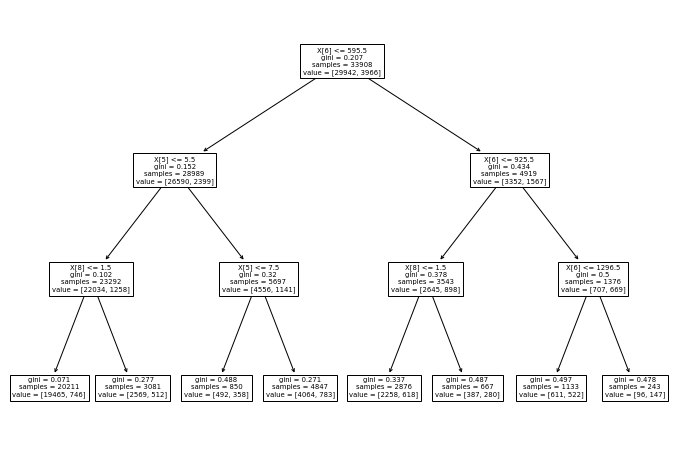

In [41]:
plt.figure(figsize=(12,8))
tree.plot_tree(dt_gini.fit(X_train, Y_train)) 